In [29]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import plotly.graph_objects as go
import plotly.io as pio
from statsmodels.tsa.seasonal import seasonal_decompose


In [30]:
# Data Download 
ticker_symbol = '^NSEI'
df = yf.download(ticker_symbol, period='max', progress=False)

In [31]:
df.head()

Price             Close         High          Low         Open Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI  ^NSEI
Date                                                                 
2007-09-17  4494.649902  4549.049805  4482.850098  4518.450195      0
2007-09-18  4546.200195  4551.799805  4481.549805  4494.100098      0
2007-09-19  4732.350098  4739.000000  4550.250000  4550.250000      0
2007-09-20  4747.549805  4760.850098  4721.149902  4734.850098      0
2007-09-21  4837.549805  4855.700195  4733.700195  4752.950195      0

In [32]:
df.shape

(4388, 5)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4388 entries, 2007-09-17 to 2025-08-06
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^NSEI)   4388 non-null   float64
 1   (High, ^NSEI)    4388 non-null   float64
 2   (Low, ^NSEI)     4388 non-null   float64
 3   (Open, ^NSEI)    4388 non-null   float64
 4   (Volume, ^NSEI)  4388 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 205.7 KB


In [34]:
df.isnull().sum()

Price   Ticker
Close   ^NSEI     0
High    ^NSEI     0
Low     ^NSEI     0
Open    ^NSEI     0
Volume  ^NSEI     0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.nunique()

Price   Ticker
Close   ^NSEI     4337
High    ^NSEI     4349
Low     ^NSEI     4349
Open    ^NSEI     4347
Volume  ^NSEI     2155
dtype: int64

In [37]:
df.describe()

Price          Close          High           Low          Open        Volume
Ticker         ^NSEI         ^NSEI         ^NSEI         ^NSEI         ^NSEI
count    4388.000000   4388.000000   4388.000000   4388.000000  4.388000e+03
mean    10586.449228  10649.429706  10520.466518  10592.681758  2.093040e+05
std      6012.845360   6033.249051   5990.570221   6015.294065  2.068554e+05
min      2524.199951   2585.300049   2252.750000   2553.600098  0.000000e+00
25%      5651.137573   5699.012451   5608.075073   5649.962524  0.000000e+00
50%      8607.750000   8652.850098   8552.550293   8611.725098  1.852000e+05
75%     14645.487549  14756.137451  14517.324951  14704.500000  2.915000e+05
max     26216.050781  26277.349609  26151.400391  26248.250000  1.811000e+06

In [38]:
# Create a new DataFrame to work with
df_modified = df.copy()
df_modified.columns = df_modified.columns.get_level_values(0)
df_modified.head()

Price             Close         High          Low         Open  Volume
Date                                                                  
2007-09-17  4494.649902  4549.049805  4482.850098  4518.450195       0
2007-09-18  4546.200195  4551.799805  4481.549805  4494.100098       0
2007-09-19  4732.350098  4739.000000  4550.250000  4550.250000       0
2007-09-20  4747.549805  4760.850098  4721.149902  4734.850098       0
2007-09-21  4837.549805  4855.700195  4733.700195  4752.950195       0

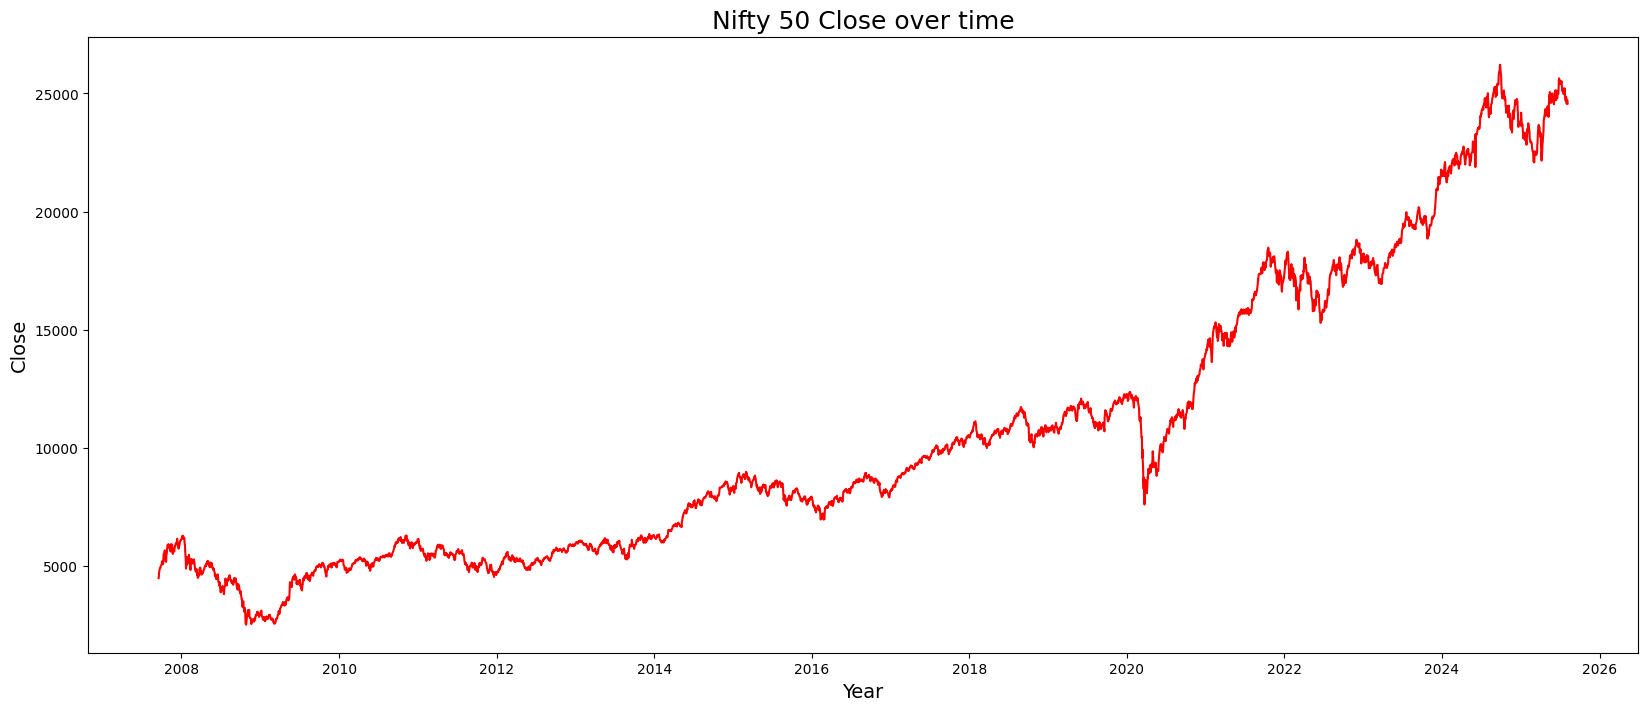

In [39]:
##Closing price over the years
plt.figure(figsize=(20,8))
plt.plot(df_modified['Close'],color = 'red')
plt.title('Nifty 50 Close over time',fontsize = 18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Close', fontsize=14)
plt.show()

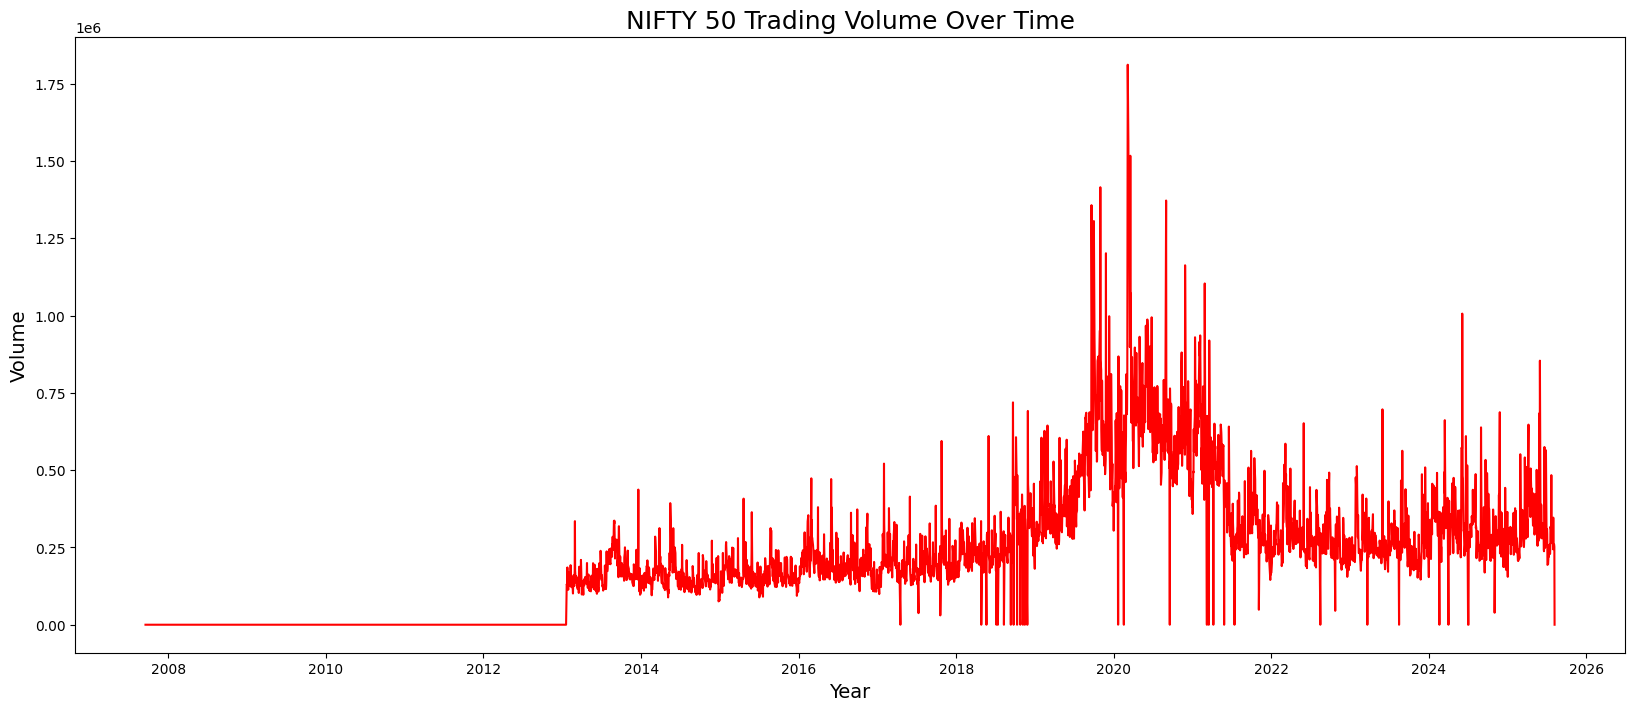

In [40]:
#Volume over the years 
plt.figure(figsize=(20,8))
plt.plot(df_modified['Volume'], color='red')
plt.title('NIFTY 50 Trading Volume Over Time', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.show()

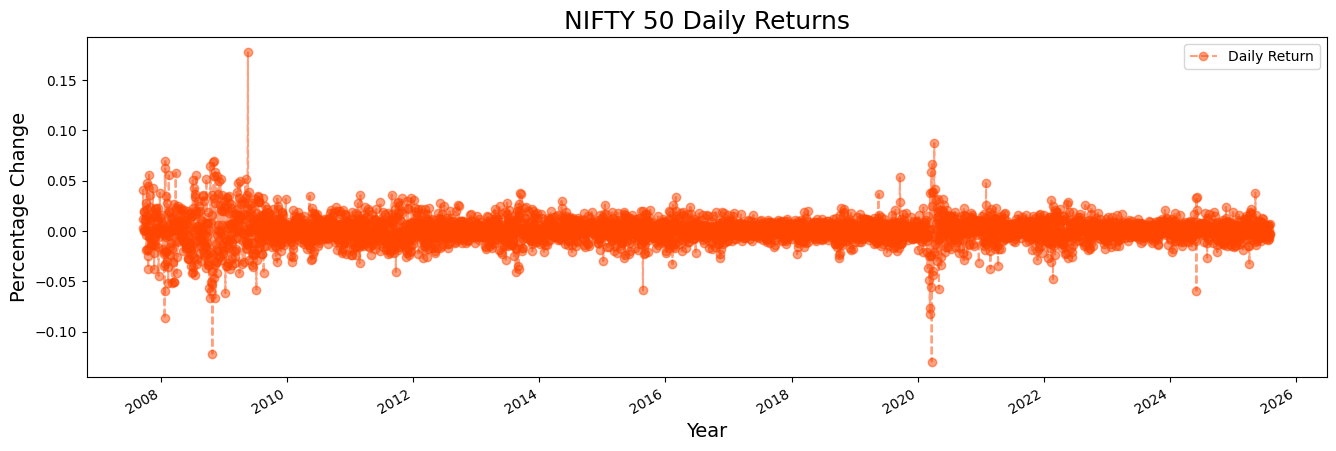

In [41]:
# Calculate daily returns using the percentage change method
df_modified['Daily Return'] = df_modified['Close'].pct_change()

# Plotting the daily returns
plt.figure(figsize=(16, 5))
df_modified['Daily Return'].plot(legend=True, linestyle='--', marker='o', alpha=0.5, color='orangered')
plt.title('NIFTY 50 Daily Returns', fontsize=18)
plt.ylabel('Percentage Change', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

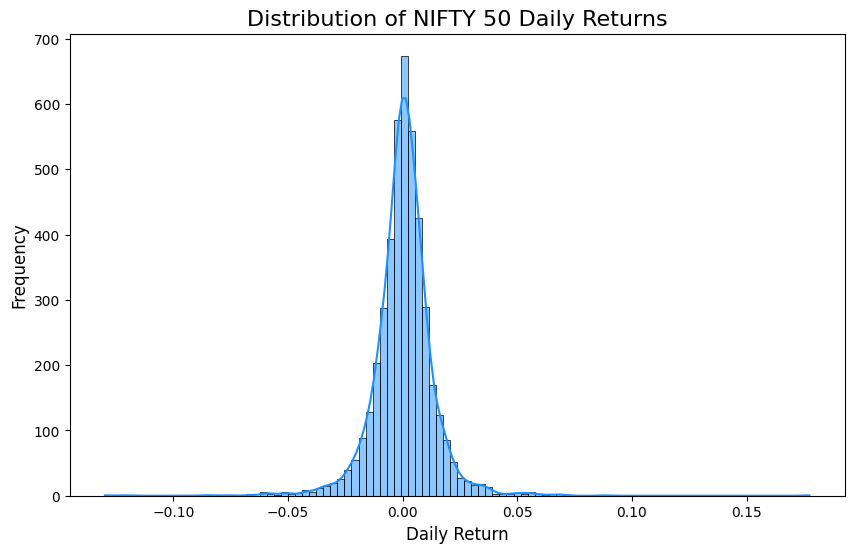

In [42]:
# Plotting the distribution of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(df_modified['Daily Return'].dropna(), bins=100, kde=True, color='dodgerblue')
plt.title('Distribution of NIFTY 50 Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

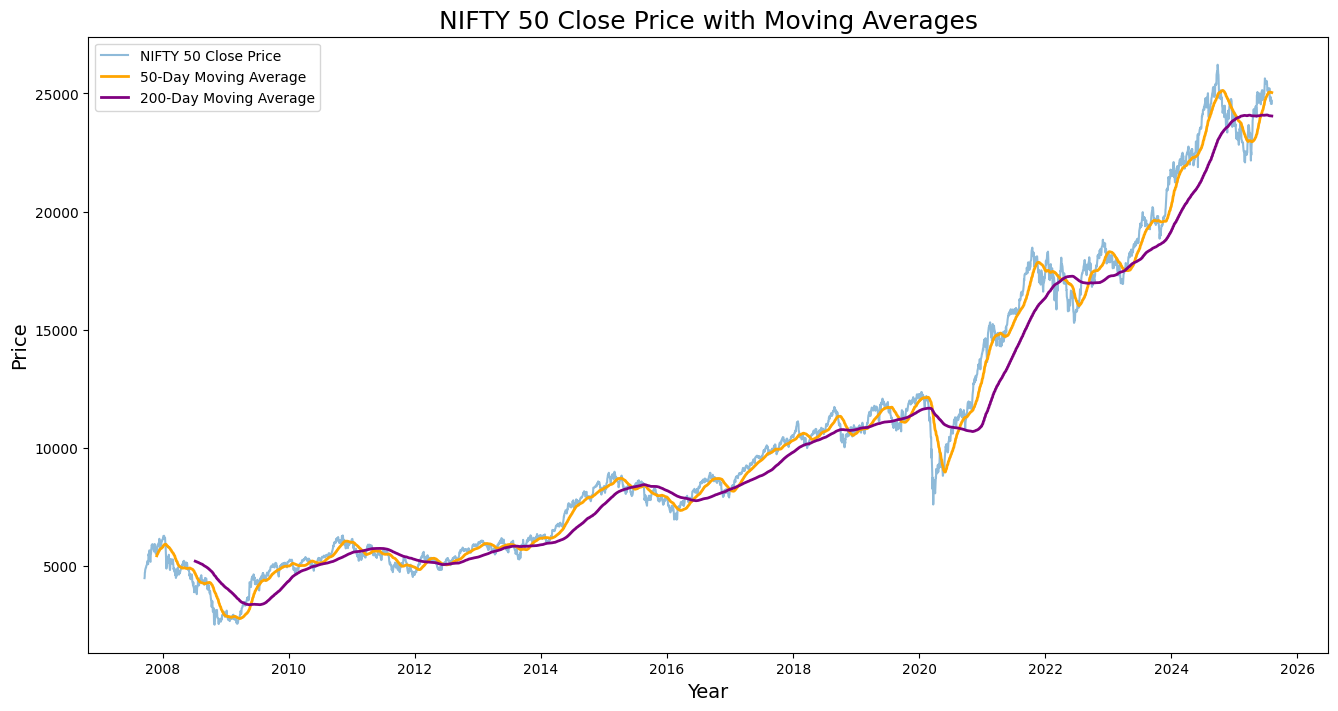

In [43]:
# Calculate the 50-day and 200-day moving averages
df_modified['MA50'] = df_modified['Close'].rolling(window=50).mean()
df_modified['MA200'] = df_modified['Close'].rolling(window=200).mean()

# Plot the closing price and the moving averages
plt.figure(figsize=(16, 8))
plt.plot(df_modified['Close'], label='NIFTY 50 Close Price', alpha=0.5)
plt.plot(df_modified['MA50'], label='50-Day Moving Average', color='orange',linewidth=2)
plt.plot(df_modified['MA200'], label='200-Day Moving Average', color='purple',linewidth=2)
plt.title('NIFTY 50 Close Price with Moving Averages', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.show()

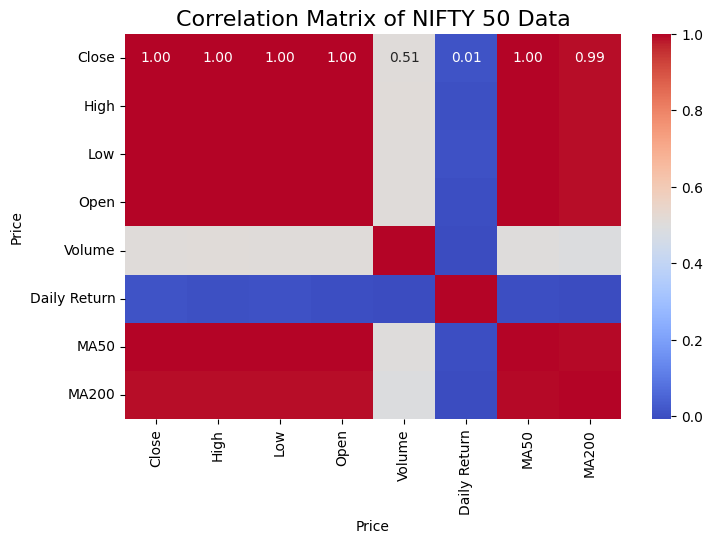

In [44]:
#HeatMap
correlation_matrix = df_modified.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of NIFTY 50 Data', fontsize=16)
plt.show()

In [45]:
pio.renderers.default = "notebook"

# Select the last 100 days from our clean DataFrame
recent_df = df_modified.tail(100)

# Create the candlestick figure using the clean data
fig = go.Figure(data=[go.Candlestick(
    x=recent_df.index,
    open=recent_df['Open'],
    high=recent_df['High'],
    low=recent_df['Low'],
    close=recent_df['Close']
)])

# Update the layout for a clean title and axis labels
fig.update_layout(
    title='NIFTY 50 Candlestick Chart (Last 100 Days)',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

fig.show()

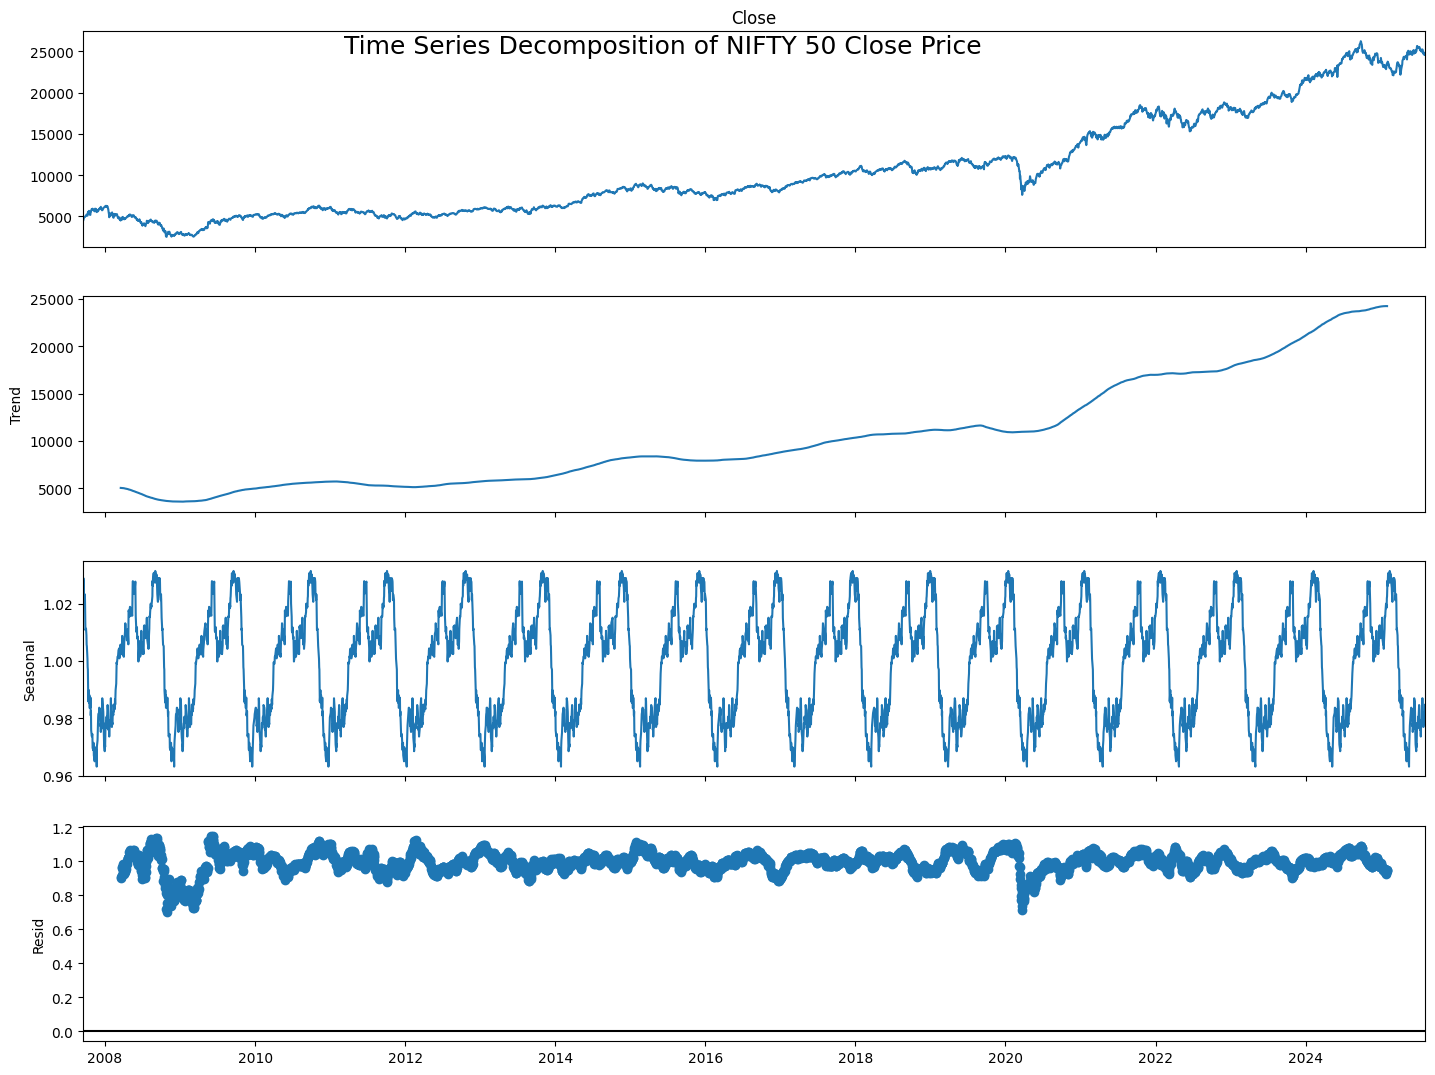

In [46]:
decomposition = seasonal_decompose(df_modified['Close'], model='multiplicative', period=252)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(16, 12)
plt.suptitle('Time Series Decomposition of NIFTY 50 Close Price', y=0.92, fontsize=18)
plt.show()

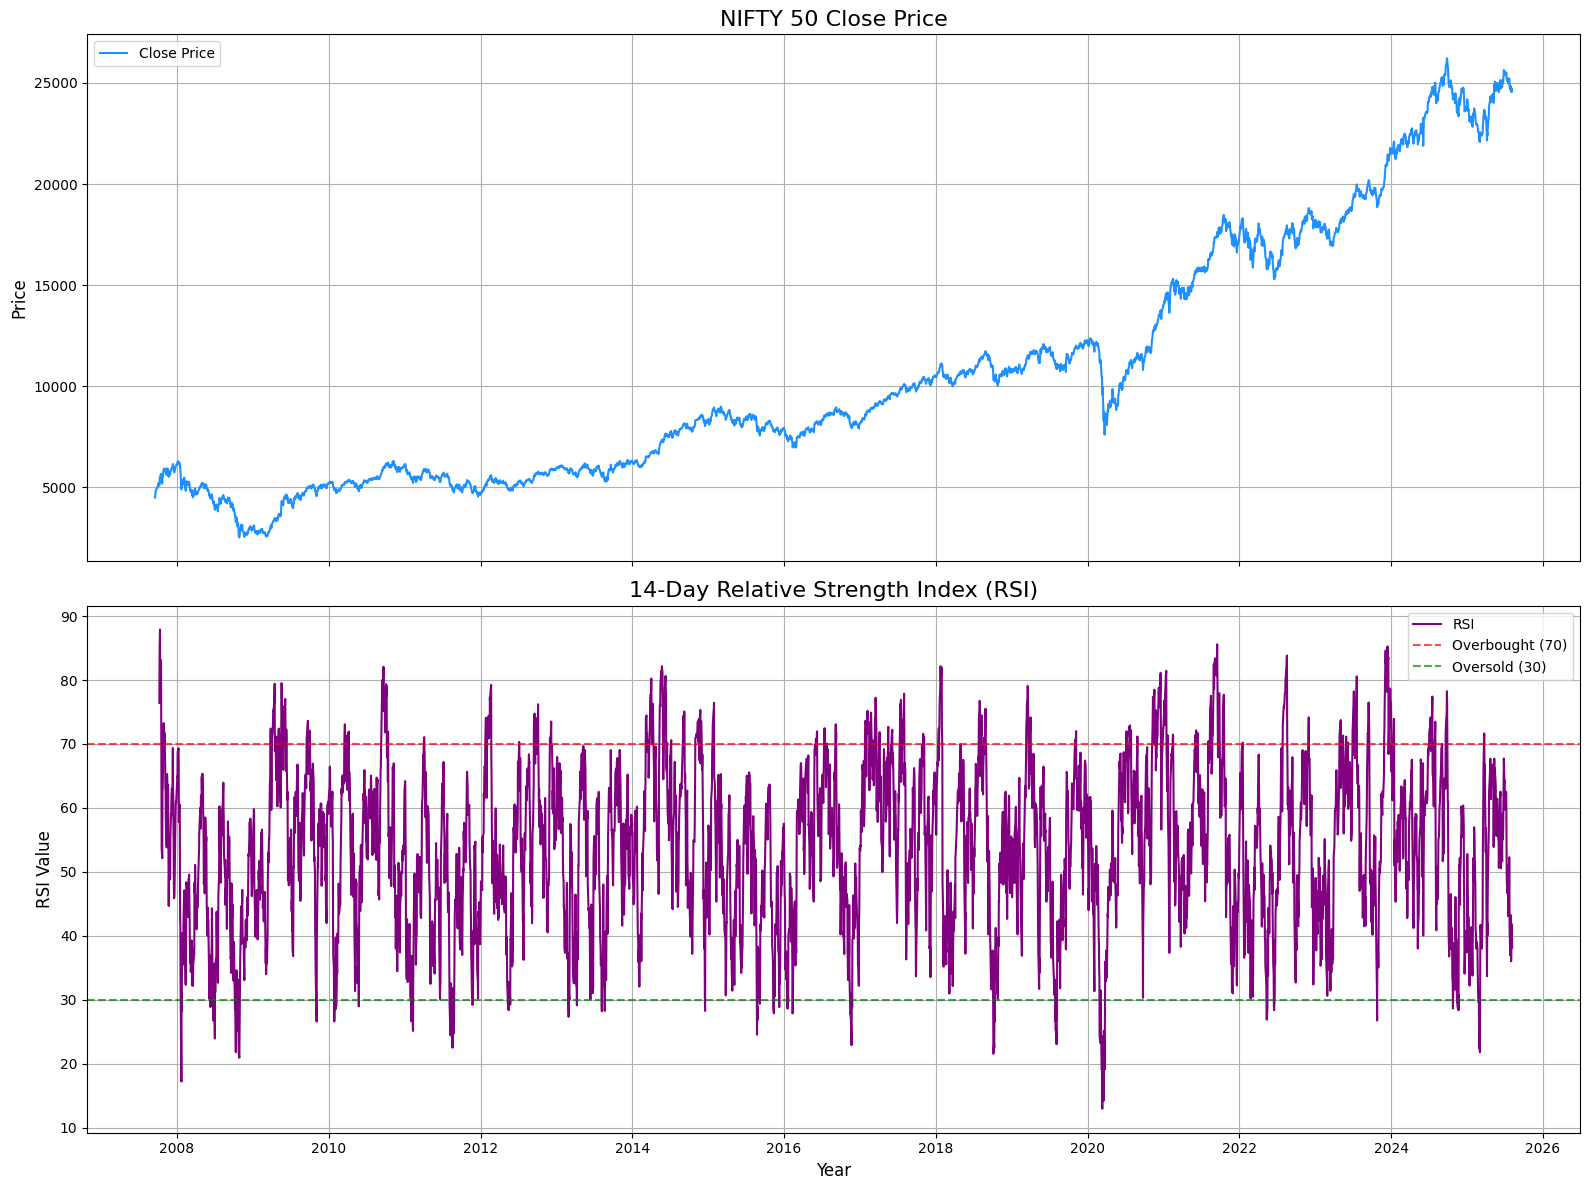

In [48]:
# Calculate the 14-day RSI on the modified DataFrame and add it as a new column
df_modified['RSI'] = ta.rsi(df_modified['Close'], length=14)

# --- Plotting ---
# Create the plot with two subplots: one for price, one for RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# Plot 1: Closing Price from df_modified
ax1.plot(df_modified['Close'], label='Close Price', color='dodgerblue')
ax1.set_title('NIFTY 50 Close Price', fontsize=16)
ax1.set_ylabel('Price', fontsize=12)
ax1.legend()
ax1.grid(True)

# Plot 2: RSI from df_modified
ax2.plot(df_modified['RSI'], label='RSI', color='purple')
# Add overbought and oversold lines for context
ax2.axhline(70, linestyle='--', color='red', alpha=0.7, label='Overbought (70)')
ax2.axhline(30, linestyle='--', color='green', alpha=0.7, label='Oversold (30)')
ax2.set_title('14-Day Relative Strength Index (RSI)', fontsize=16)
ax2.set_ylabel('RSI Value', fontsize=12)
ax2.set_xlabel('Year', fontsize=12)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### Main Data

In [49]:
df.head()

Price             Close         High          Low         Open Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI  ^NSEI
Date                                                                 
2007-09-17  4494.649902  4549.049805  4482.850098  4518.450195      0
2007-09-18  4546.200195  4551.799805  4481.549805  4494.100098      0
2007-09-19  4732.350098  4739.000000  4550.250000  4550.250000      0
2007-09-20  4747.549805  4760.850098  4721.149902  4734.850098      0
2007-09-21  4837.549805  4855.700195  4733.700195  4752.950195      0

### Data for model training

In [50]:
df_modified.tail()

Price              Close          High           Low          Open  Volume  \
Date                                                                         
2025-07-31  24768.349609  24956.500000  24635.000000  24642.250000  346300   
2025-08-01  24565.349609  24784.150391  24535.050781  24734.900391  263400   
2025-08-04  24722.750000  24736.250000  24554.000000  24596.050781  259300   
2025-08-05  24649.550781  24733.099609  24590.300781  24720.250000  251800   
2025-08-06  24574.199219  24671.400391  24539.199219  24641.349609       0   

Price       Daily Return          MA50         MA200        RSI  
Date                                                             
2025-07-31     -0.003488  25057.622070  24053.279277  40.914833  
2025-08-01     -0.008196  25051.866055  24050.466279  36.006905  
2025-08-04      0.006407  25046.298047  24048.793281  41.833134  
2025-08-05     -0.002961  25042.765078  24047.184531  40.008836  
2025-08-06     -0.003057  25039.200078  24046.306279  38.163831